In [10]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

#pd.__version__

In [20]:
Bouy = pd.read_csv('https://www.ndbc.noaa.gov/data/realtime2/46237.spec', delim_whitespace=True)
Bouy = Bouy.drop([0])
#Bouy[['WVHT','SwH', 'WWH' ]] = Bouy[['WVHT','SwH', 'WWH' ]] * 3.28084
#Bouy.info()

Bouy['Time'] = Bouy['#YY'].astype(str) + ' '+ Bouy['MM'].astype(str)+ ' ' + Bouy['DD'].astype(str) + ' '+ Bouy['hh'].astype(str)+ ' ' + Bouy['mm'].astype(str)
Bouy = Bouy.apply(pd.to_numeric, errors='ignore') #convert everything we can as numeric, errors are ignored
Bouy['Time'] = pd.to_datetime (Bouy['Time'], format = "%Y %m %d %H %M" ) #Parse Date
Bouy['Time'] = Bouy['Time'] - datetime.timedelta(hours=8)  #convert from GMT  to PSR
Bouy =Bouy.set_index(Bouy['Time']) #Set Time series as index

#convert height from meter to feet .

Bouy[['WVHT','SwH', 'WWH' ]] = Bouy[['WVHT','SwH', 'WWH' ]].multiply(3.28084, axis="index")




In [31]:
Bouy_d = Bouy.resample('1D').mean().reset_index()
Bouy_d.head()

,Time,#YY,MM,DD,hh,mm,WVHT,SwH,SwP,WWH,WWP,APD,MWD
0,2018-10-22,2018.0,10.0,23.000000,3.500000,15.000000,3.916503,3.260335,17.356250,2.235072,9.475000,8.650000,250.687500
1,2018-10-23,2018.0,10.0,23.347826,11.347826,15.000000,3.808627,3.316501,17.193478,1.854388,8.978261,9.573913,246.282609
2,2018-10-24,2018.0,10.0,24.326087,11.652174,15.000000,4.265092,3.587527,15.591304,2.289456,9.154348,8.939130,249.521739
3,2018-10-25,2018.0,10.0,25.355556,11.311111,14.666667,5.890930,4.790026,13.660000,3.412074,9.455556,8.460000,262.000000
4,2018-10-26,2018.0,10.0,26.333333,11.500000,15.000000,6.459154,5.338200,13.391667,3.588419,9.312500,8.866667,269.916667


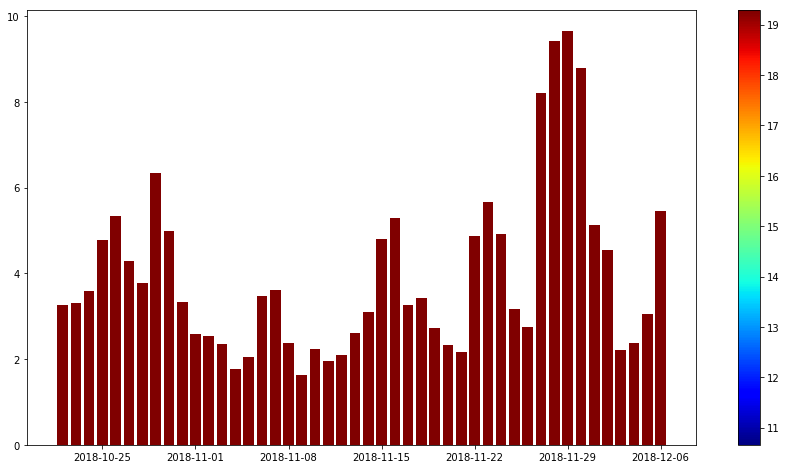

In [54]:
from matplotlib import cm
pd.plotting.deregister_matplotlib_converters()
y = Bouy_d.SwH
p = Bouy_d.SwP
colors = cm.jet(p/10)
fig, ax = plt.subplots(figsize=(15,8))

plot = plt.scatter(y, y, c =p, cmap = 'jet')
plt.clf()
plt.colorbar(plot)
plt.bar(Bouy_d.Time, y, color = colors)

# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*len(Bouy_d.Time)
# Every 4th ticklable shows the month and day
ticklabels[::4] = [item.strftime('%b %d') for item in Bouy_d.Time[::4]]
# Every 12th ticklabel includes the year
ticklabels[::12] = [item.strftime('%b %d\n%Y') for item in Bouy_d.Time[::12]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
#plt.gcf().autofmt_xdate()

plt.show()

In [15]:
Bouy

,#YY,MM,DD,hh,mm,WVHT,SwH,SwP,WWH,WWP,SwD,WWD,STEEPNESS,APD,MWD,Time
Time,,,,,,,,,,,,,,,,
2018-12-07 06:00:00,2018,12,7,6,0,7.874016,7.545932,18.2,2.624672,9.5,W,W,SWELL,14.2,267,2018-12-07 06:00:00
2018-12-07 05:30:00,2018,12,7,5,30,8.530184,8.202100,18.2,2.952756,9.1,W,W,SWELL,14.4,268,2018-12-07 05:30:00
2018-12-07 05:00:00,2018,12,7,5,0,7.874016,7.545932,18.2,2.624672,9.1,W,W,SWELL,14.1,263,2018-12-07 05:00:00
2018-12-07 04:30:00,2018,12,7,4,30,8.858268,8.530184,18.2,2.952756,9.5,W,W,SWELL,14.6,270,2018-12-07 04:30:00
2018-12-07 04:00:00,2018,12,7,4,0,8.530184,8.202100,18.2,2.624672,9.5,W,W,SWELL,14.8,269,2018-12-07 04:00:00
2018-12-07 03:30:00,2018,12,7,3,30,6.889764,6.233596,20.0,2.296588,9.5,W,W,SWELL,13.7,269,2018-12-07 03:30:00
2018-12-07 03:00:00,2018,12,7,3,0,8.858268,8.530184,18.2,2.952756,9.5,W,W,SWELL,14.8,273,2018-12-07 03:00:00
2018-12-07 02:30:00,2018,12,7,2,30,7.217848,6.889764,18.2,2.624672,9.5,W,W,SWELL,13.9,270,2018-12-07 02:30:00
2018-12-07 02:00:00,2018,12,7,2,0,8.202100,7.545932,18.2,2.952756,9.5,W,W,SWELL,14.1,274,2018-12-07 02:00:00


In [19]:
Bouy['Time']
(Bouy['Time']) - datetime.timedelta(hours=8)

Time
2018-12-07 06:00:00   2018-12-06 22:00:00
2018-12-07 05:30:00   2018-12-06 21:30:00
2018-12-07 05:00:00   2018-12-06 21:00:00
2018-12-07 04:30:00   2018-12-06 20:30:00
2018-12-07 04:00:00   2018-12-06 20:00:00
2018-12-07 03:30:00   2018-12-06 19:30:00
2018-12-07 03:00:00   2018-12-06 19:00:00
2018-12-07 02:30:00   2018-12-06 18:30:00
2018-12-07 02:00:00   2018-12-06 18:00:00
2018-12-07 01:30:00   2018-12-06 17:30:00
2018-12-07 01:00:00   2018-12-06 17:00:00
2018-12-07 00:30:00   2018-12-06 16:30:00
2018-12-07 00:00:00   2018-12-06 16:00:00
2018-12-06 23:30:00   2018-12-06 15:30:00
2018-12-06 23:00:00   2018-12-06 15:00:00
2018-12-06 22:30:00   2018-12-06 14:30:00
2018-12-06 22:00:00   2018-12-06 14:00:00
2018-12-06 21:30:00   2018-12-06 13:30:00
2018-12-06 21:00:00   2018-12-06 13:00:00
2018-12-06 20:30:00   2018-12-06 12:30:00
2018-12-06 20:00:00   2018-12-06 12:00:00
2018-12-06 19:30:00   2018-12-06 11:30:00
2018-12-06 19:00:00   2018-12-06 11:00:00
2018-12-06 18:30:00   2018-12